In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.graph_objects as go
import utils
from utils import train_test_split
from custom_preprocess import preprocess
import os
from statsmodels.stats.diagnostic import acorr_ljungbox
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, BatchNormalization, Input, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error, r2_score
import warnings
# Suppress the SettingWithCopyWarning
warnings.filterwarnings("ignore", category=pd.errors.SettingWithCopyWarning)
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import seaborn as sns

ModuleNotFoundError: No module named 'utils'

In [ ]:
from utils import train_test_split
from custom_preprocess import preprocess
import pandas as pd

import warnings
# Suppress the SettingWithCopyWarning
warnings.filterwarnings("ignore", category=pd.errors.SettingWithCopyWarning)

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import xgboost as xgb
from xgboost import XGBRegressor
from xgboost import XGBClassifier

from sklearn.metrics import log_loss, roc_auc_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Data Preprocessing

#### Identifiers: 153 Variables from "Is There a Replication Crisis in Finance?" JoF 2023

<details>
  <summary>**0. Target Variable**</summary>

  - `y`: Return at time $t+1$.

</details>

<details>
  <summary>**1. Identifiers**</summary>

  - `id`: Unique identifier for each firm.
  - `eom`: End of the month date (timestamp for the observation).
  - `excntry`: Exchange country where the firm is listed.
  - `gvkey`: Global company key (used for linking firms across datasets).
  - `permno`: PERMNO, a unique identifier for firms in CRSP.
  - `ret`: Return at time $t$ (dependent variable for current time step).

</details>

<details>
  <summary>**2. Valuation Ratios**</summary>

  - `be_me`: Book equity to market equity ratio.
  - `debt_me`: Total debt to market equity ratio.
  - `ni_me`: Net income to market equity ratio.
  - `fcf_me`: Free cash flow to market equity ratio.

</details>

<details>
  <summary>**3. Growth Metrics**</summary>

  - `sale_gr1`: Sales growth over the last year.
  - `at_gr1`: Total assets growth over the last year.
  - `inv_gr1a`: Inventory growth over the last year (adjusted).

</details>

<details>
  <summary>**4. Financial Ratios**</summary>

  - `at_me`: Total assets to market equity.
  - `sale_me`: Sales to market equity.
  - `ebitda_mev`: EBITDA to market enterprise value.

</details>

<details>
  <summary>**5. Profitability Metrics**</summary>

  - `gp_at`: Gross profitability (gross profit to total assets).
  - `op_at`: Operating profitability (operating profit to total assets).
  - `niq_at`: Net income to total assets (quarterly).

</details>

<details>
  <summary>**6. Risk Metrics**</summary>

  - `ivol_ff3_21d`: Idiosyncratic volatility based on Fama-French 3-factor model (21 days).
  - `beta_60m`: Beta estimated over 60 months.
  - `rvol_21d`: Realized volatility over the past 21 days.

</details>

<details>
  <summary>**7. Other Metrics**</summary>

  - `tangibility`: Tangible asset ratio.
  - `z_score`: Altman’s Z-score (credit risk indicator).
  - `f_score`: Piotroski F-score (financial health indicator).

</details>

<details>
  <summary>**8. Size & Growth Metrics**</summary>

  - `size_grp`: Firm size group or decile.
  - `me`: Market equity (stock price * shares outstanding).
  - `niq_su`: Net income quarterly, scaled by an appropriate factor (e.g., shares or unit of measurement).
  - `ret_6_1`: Stock return from 6 months to 1 month before.
  - `ret_12_1`: Stock return from 12 months to 1 month before.
  - `saleq_su`: Quarterly sales, scaled by an appropriate factor.
  - `tax_gr1a`: Tax growth over the last year, adjusted.
  - `ni_inc8q`: Net income over the past 8 quarters.
  - `prc_highprc_252d`: Price relative to the highest price over the last 252 days.

</details>

<details>
  <summary>**9. Residuals & Ratios**</summary>

  - `resff3_6_1`: Residual from Fama-French 3-factor model for return over 6 to 1 months prior.
  - `resff3_12_1`: Residual from Fama-French 3-factor model for return over 12 to 1 months prior.
  - `ret_60_12`: Stock return from 60 months to 12 months before.

</details>

<details>
  <summary>**10. Valuation Metrics**</summary>

  - `div12m_me`: Dividends over the last 12 months relative to market equity.
  - `eqpo_me`: Equity purchases to market equity ratio.
  - `eqnpo_me`: Equity net purchases to market equity ratio.
  - `sale_gr3`: Sales growth over the last 3 years.

</details>

<details>
  <summary>**11. Cash Flow Metrics**</summary>

  - `ocf_me`: Operating cash flow to market equity.
  - `ival_me`: Investment to assets to market equity.
  - `bev_mev`: Book enterprise value to market enterprise value.
  - `netdebt_me`: Net debt to market equity.

</details>

<details>
  <summary>**12. Capital Expenditure & Investments**</summary>

  - `capex_abn`: Abnormal capital expenditures.
  - `ppeinv_gr1a`: Growth in property, plant, and equipment investments (adjusted).
  - `capx_gr1`: Capital expenditures growth over the last year.
  - `capx_gr2`: Capital expenditures growth over the last 2 years.
  - `capx_gr3`: Capital expenditures growth over the last 3 years.

</details>

<details>
  <summary>**13. Accruals & Net Operating Assets**</summary>

  - `oaccruals_at`: Operating accruals relative to total assets.
  - `taccruals_at`: Total accruals relative to total assets.
  - `noa_at`: Net operating assets relative to total assets.
  - `noa_gr1a`: Net operating assets growth over the last year (adjusted).

</details>

<details>
  <summary>**14. Profitability Metrics (Cont.)**</summary>

  - `ebit_bev`: Earnings before interest and taxes to book enterprise value.
  - `ebit_sale`: Earnings before interest and taxes to sales.
  - `sale_bev`: Sales to book enterprise value.
  - `gp_atl1`: Gross profit to total assets lagged by 1 year.
  - `op_atl1`: Operating profit to total assets lagged by 1 year.

</details>

<details>
  <summary>**15. Financial Ratios & Scores**</summary>

  - `o_score`: Ohlson O-score (probability of bankruptcy).
  - `pi_nix`: Price to net income ratio excluding extraordinary items.
  - `saleq_gr1`: Quarterly sales growth over the last year.
  - `opex_at`: Operating expenses relative to total assets.
  - `emp_gr1`: Employee growth over the last year.
  - `rd_me`: Research and development to market equity.

</details>

<details>
  <summary>**16. Seasonality & Other Characteristics**</summary>

  - `seas_1_1an`: Seasonality over 1 to 1 years for anomalous observations.
  - `seas_1_1na`: Seasonality over 1 to 1 years for non-anomalous observations.
  - `seas_16_20an`: Seasonality over 16 to 20 years for anomalous observations.
  - `market_equity`: Market value of equity.
  - `ivol_capm_252d`: Idiosyncratic volatility based on CAPM (252 days).
  - `rvol_21d`: Realized volatility over the past 21 days.

</details>

<details>
  <summary>**17. Missing Variables (Explained)**</summary>

  - `ope_bel1`: Operating earnings relative to book equity, lagged by one year.
  - `beta_dimson_21d`: Dimson beta estimated over 21 days.
  - `earnings_variability`: Variability in earnings, measured as the standard deviation of earnings over a certain period.
  - `mispricing_perf`: Mispricing related to performance.
  - `age`: Firm age, typically calculated as the number of years since the firm was first listed.
  - `niq_at_chg1`: Change in net income to assets ratio (quarterly).
  - `qmj_safety`: Quality-minus-junk (QMJ) safety factor.
  - `dsale_dsga`: Change in sales to change in selling, general, and administrative expenses.
  - `seas_2_5an`: Seasonality factor for the second to the fifth year, with anomalies.
  - `taccruals_ni`: Total accruals relative to net income.
  - `eqnpo_12m`: Net equity purchases over the last 12 months.
  - `prc`: Stock price.
  - `ni_be`: Net income relative to book equity.
  - `nfna_gr1a`: Growth in non-financial net assets over the last year (adjusted).
  - `ni_ivol`: Idiosyncratic volatility of net income.
  - `cop_atl1`: Cash operating profit to total assets, lagged by one year.
  - `seas_6_10an`: Seasonality factor for the sixth to the tenth year, with anomalies.
  - `ff49`: Fama-French 49 industry classification.
  - `dgp_dsale`: Change in gross profit to change in sales.
  - `debt_gr3`: Debt growth over the last three years.
  - `seas_11_15an`: Seasonality factor for the eleventh to fifteenth year, with anomalies.
  - `dsale_drec`: Change in sales to change in receivables.
  - `ocfq_saleq_std`: Standard deviation of operating cash flow to quarterly sales.
  - `rd_sale`: Research and development expenditure relative to sales.
  - `dolvol_126d`: Dollar volume over 126 days.
  - `turnover_126d`: Stock turnover over 126 days.
  - `ret_3_1`: Stock return from three months to one month before.
  - `iskew_capm_21d`: Idiosyncratic skewness based on CAPM over 21 days.
  - `betabab_1260d`: Beta of the firm's stock relative to a broader market factor, estimated over 1260 days.
  - `bidaskhl_21d`: High-low bid-ask spread over 21 days.
  - `cowc_gr1a`: Growth in current operating working capital over the last year (adjusted).
  - `chcsho_12m`: Change in common shares outstanding over the last 12 months.
  - `be_gr1a`: Growth in book equity over the last year (adjusted).
  - `fnl_gr1a`: Growth in financial liabilities over the last year (adjusted).
  - `col_gr1a`: Growth in current liabilities over the last year (adjusted).
  - `netis_at`: Net income relative to total assets.
  - `qmj`: Quality-minus-junk factor.
  - `betadown_252d`: Downside beta estimated over 252 days.
  - `lti_gr1a`: Growth in long-term investments over the last year (adjusted).
  - `coskew_21d`: Co-skewness with the market over 21 days.
  - `sale_emp_gr1`: Sales per employee growth over the last year.
  - `niq_be_chg1`: Change in net income relative to book equity (quarterly).
  - `cash_at`: Cash holdings relative to total assets.
  - `eqnetis_at`: Equity net issuance relative to total assets.
  - `lnoa_gr1a`: Growth in long-term net operating assets over the last year (adjusted).
  - `at_turnover`: Total assets turnover ratio.
  - `qmj_prof`: Quality-minus-junk factor related to profitability.
  - `rmax5_21d`: Maximum daily return over the top 5 days in the last 21 days.
  - `niq_be`: Net income to book equity (quarterly).
  - `ret_1_0`: Stock return from one month before to the current month.
  - `ami_126d`: Amihud illiquidity measure over 126 days.
  - `nncoa_gr1a`: Growth in non-current net operating assets over the last year (adjusted).
  - `ni_ar1`: Autoregressive component of net income (lagged by one period).
  - `seas_6_10na`: Seasonality factor for the sixth to tenth year, non-anomalous.
  - `ret_12_7`: Stock return from the twelfth month to the seventh month before.

</details>
cratic volatility based on CAPM (252 days).
    - `rvol_21d`: Realized volatility over the past 21 days.


In [ ]:
df = pd.read_csv("GFD_final.csv")
# Convert to datetime
df['eom'] = pd.to_datetime(df['eom'])

#### Training 1: Test set (1995-2016), Validation set (2017-2020), Test set (2021)
#### Training 2: Test set (1995-2017), Validation set (2018-2021), Test set (2022)
#### Training 3: Test set (1995-2018), Validation set (2019-2022), Test set (2023)

In [ ]:
# Splitting the data by year for the different sets
# X_train, X_val, X_test, y_train, y_val, y_test = train_test_split(df,"y", 2017, 2020, 2021)
X_train, X_val, X_test, y_train, y_val, y_test = train_test_split(df,"y", 2018, 2021, 2022)
# X_train, X_val, X_test, y_train, y_val, y_test = train_test_split(df,"y", 2019, 2022, 2023)

In [ ]:
ids = ["excntry","gvkey","permno", "split"]
X_train.drop(columns=ids, inplace=True)
X_val.drop(columns=ids, inplace=True)
X_test.drop(columns=ids, inplace=True)

In [ ]:
ff3 = pd.read_csv("factors_ff_clean.csv")
X_train["year_month"] = X_train.eom.dt.year.astype(str) + "-" + X_train.eom.dt.month.astype(str) + "-01"
X_val["year_month"] = X_val.eom.dt.year.astype(str) + "-" + X_val.eom.dt.month.astype(str) + "-01"
X_test["year_month"] = X_test.eom.dt.year.astype(str) + "-" + X_test.eom.dt.month.astype(str) + "-01"


X_train["year_month"] = pd.to_datetime(X_train["year_month"])
X_val["year_month"] = pd.to_datetime(X_val["year_month"])
X_test["year_month"] = pd.to_datetime(X_test["year_month"])

ff3.date = pd.to_datetime(ff3.date)
X_train = pd.merge(X_train,ff3, left_on = "year_month", right_on = "date", how = "left")
X_val = pd.merge(X_val,ff3, left_on = "year_month", right_on = "date", how = "left")
X_test = pd.merge(X_test,ff3, left_on = "year_month", right_on = "date", how = "left")

X_train.drop(columns=["eom","year_month"], inplace = True)
X_val.drop(columns=["eom","year_month"], inplace = True)
X_test.drop(columns=["eom","year_month"], inplace = True)

In [ ]:
# Concatenate to apply the preprocessing function
train = pd.concat([X_train, y_train], axis=1)
val = pd.concat([X_val, y_val], axis=1)
test = pd.concat([X_test, y_test], axis=1)

# Apply preprocessing
train = preprocess(train)
val = preprocess(val)
test = preprocess(test)

In [ ]:
train["target"] = (train["y"] > 1.2*train["ret"]).astype(int)
val["target"] = (val["y"] > 1.2*val["ret"]).astype(int)
test["target"] = (test["y"] > 1.2*test["ret"]).astype(int)

In [ ]:
testing_real_returns1 = test["y"]
testing_real_returns2 = val["ret"]

In [ ]:
y_train = train["target"]
X_train = train.drop(columns=["y","target","date"])

y_val = val["target"]
X_val = val.drop(columns=["y","target","date"])

y_test = test["target"]
X_test = test.drop(columns=["y","target", "date"])

In [ ]:
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)

(254833, 166) (254833,)
(44105, 166) (44105,)
(21874, 166) (21874,)


In [ ]:
# If columns are not matching it means that is because one of the industry' categories is not represented
common_columns = set(X_train.columns) & set(X_val.columns) & set(X_test.columns)

# Subset each DataFrame to include only the common columns
X_train = X_train[list(common_columns)]
X_val = X_val[list(common_columns)]
X_test = X_test[list(common_columns)]

# **Implementation of Neural Networks in Asset Pricing**

## **Introduction**
In this notebook, we implement neural network architectures for forecasting excess stock returns. The implementation shares similarities with the work by Kelly et al. in *Empirical Asset Pricing via Machine Learning*. Specifically, we leverage feed-forward neural networks with multiple hidden layers, incorporating similar regularization techniques and training strategies to achieve robust predictions.

## **Neural Network Architectures**
### **Feed-Forward Networks**
We implement fully connected feed-forward networks, similar to those discussed by Kelly et al. Our models include architectures with up to **5 hidden layers**, utilizing a **pyramidal reduction** in neuron count as the number of layers increases.

- **Layer Structures:**
  - **NN1**: 1 hidden layer with **128 neurons**.
  - **NN2**: 2 hidden layers with **128 and 64 neurons**, respectively.
  - **NN3**: 3 hidden layers with **128, 64, and 32 neurons**.
  - **NN4**: 4 hidden layers with **128, 64, 32, and 16 neurons**.
  - **NN5**: 5 hidden layers with **128, 64, 32, 16, and 8 neurons**.

These architectures follow a similar **pyramid reduction** approach to those from Kelly et al., which ensures that deeper layers have fewer neurons, focusing on the most informative features.

### **Activation Function**
- We use the **ReLU (Rectified Linear Unit)** activation function for each hidden layer, similar to the approach in the paper by Kelly et al.
  - **ReLU** encourages sparsity in active neurons, which helps in faster convergence and efficient representation of complex patterns.
  - The ReLU function is defined as:
    \[
    \text{ReLU}(x) = \max(0, x)
    \]

### **Regularization Techniques**
To improve model generalization, we apply several regularization techniques that are also discussed in Kelly et al.'s work:

1. **Batch Normalization**: Standardizes inputs to hidden layers, ensuring stable learning across different layers and epochs.
2. **Dropout**: We include Dropout layers with a rate of **0.2** between hidden layers to prevent overfitting.
3. **Early Stopping**: Used to monitor validation loss and stop training when the model starts to overfit. We use a patience of **10** epochs, allowing the model to explore optimal weights before stopping.

### **Optimization**
- We use **Adam**, an adaptive learning rate optimizer, to optimize the model weights. This is in line with the **stochastic gradient descent (SGD)** approach mentioned by Kelly et al., which aims to iteratively update weights to minimize the prediction error.
- The learning rate is initially set to **0.001** and reduced adaptively during training to ensure stable convergence.

### **Training Strategy**
- We train each model as part of an ensemble of **10 networks** initialized with different random seeds. The ensemble predictions are averaged to reduce variance and improve the robustness of the forecasts, similar to the ensemble approach described by Kelly et al.

## **Model Implementation Summary**
- **Input Layer**: Accepts **204 features**, representing various firm-level characteristics.
- **Hidden Layers**: Up to **5 layers**, with a pyramidal reduction in neuron count for each subsequent layer.
- **Activation Function**: **ReLU** activation is applied to each hidden layer to enable non-linearity.
- **Regularization Techniques**:
  - **Batch Normalization** and **Dropout** are used for robust training and prevention of overfitting.
  - **Early Stopping** is employed to prevent over-training.
- **Optimizer**: **Adam** optimizer with an initial learning rate of **0.001**.

## **Key Similarities to Kelly et al. (2020)**
- **Network Architectures**: Both models utilize feed-forward networks with up to **5 hidden layers**. The pyramidal reduction in neuron count follows a similar design philosophy to reduce over-parameterization as the depth increases.
- **Activation and Regularization**:
  - The **ReLU activation function** is used in both implementations, benefiting from sparse activations and efficient gradient propagation.
  - **Batch Normalization**, **Early Stopping**, and **Ensemble Predictions** are shared techniques between both approaches to ensure stable training and improved generalization.
- **Training Method**: Like the **SGD approach** by Kelly et al., our model uses an adaptive gradient-based optimizer (**Adam**),Squar work. Let me know if there's anything you'd like to adjust!


In [1]:
import numpy as np
import os
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.callbacks import EarlyStopping

# Define model architectures based on input dimensionality
architectures = [
    [128],  # NN1: Single hidden layer with 128 neurons
    [128, 64],  # NN2: Two hidden layers with 128 and 64 neurons
    [128, 64, 32],  # NN3: Three hidden layers with 128, 64, and 32 neurons
    [128, 64, 32, 16],  # NN4: Four hidden layers with 128, 64, 32, and 16 neurons
    [128, 64, 32, 16, 8]  # NN5: Five hidden layers with 128, 64, 32, 16, and 8 neurons
]

# Training parameters
learning_rate = 0.001
batch_size = 1000
epochs = 100
patience = 10

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=patience, restore_best_weights=True)

# Directory to save models
model_directory = "saved_models_binary_classification_best_ultimate"
os.makedirs(model_directory, exist_ok=True)  # Create directory if it doesn't exist

# Function to create model based on given architecture
def create_model(architecture):
    model = Sequential()
    model.add(Input(shape=(X_train.shape[1],)))  # Input layer with input shape of features
    for units in architecture:
        model.add(Dense(units, activation='relu'))
        model.add(BatchNormalization())
        model.add(Dropout(0.2))  # Dropout to help prevent overfitting
    model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])  # Binary classification loss
    return model

In [ ]:
model = load_model("Model_NN1.keras")

y_pred = model.predict(X_test)


In [ ]:
# Tracking best performance
best_model_path = None
best_accuracy = 0

# Training and evaluation loop for each architecture
for idx, architecture in enumerate(architectures, start=1):
    print(f"\nTraining model NN{idx} with architecture: {architecture}")

    # Create and train the model
    model = create_model(architecture)
    history = model.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=epochs,
        batch_size=batch_size,
        callbacks=[early_stopping],
        verbose=0
    )

    # Evaluate on the test set
    predictions = model.predict(X_test)
    y_pred_binary = (predictions.flatten() > 0.5).astype(int)  # Threshold for binary predictions
    accuracy = np.mean(y_pred_binary == y_test)
    print(f"Out-of-sample Accuracy for NN{idx}: {accuracy:.4f}")

    # Save the model with a unique name for each architecture
    model_path = os.path.join(model_directory, f"Model_NN{idx}.keras")
    model.save(model_path)
    print(f"Model NN{idx} saved to: {model_path}")

    # Update best model if applicable
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model_path = model_path

# Final best model summary
print(f"\nBest model saved: {best_model_path} with accuracy: {best_accuracy:.4f}")

Loading model from: saved_models_binary_classification_best_2\Model_NN1.keras
Loading model from: saved_models_binary_classification_best_2\Model_NN2.keras
Loading model from: saved_models_binary_classification_best_2\Model_NN3.keras
Loading model from: saved_models_binary_classification_best_2\Model_NN4.keras
Loading model from: saved_models_binary_classification_best_2\Model_NN5.keras


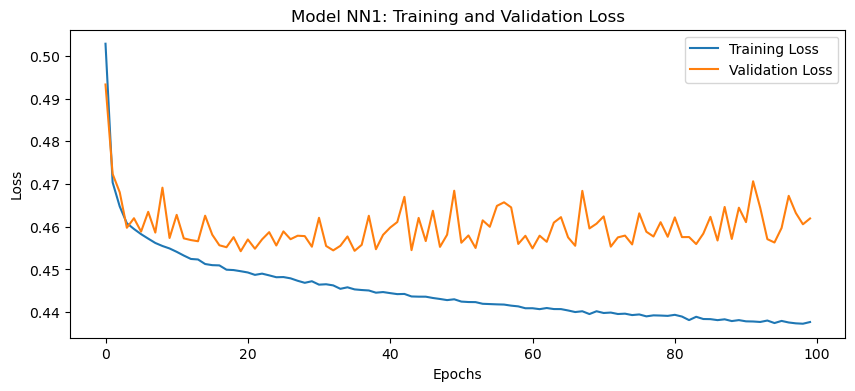

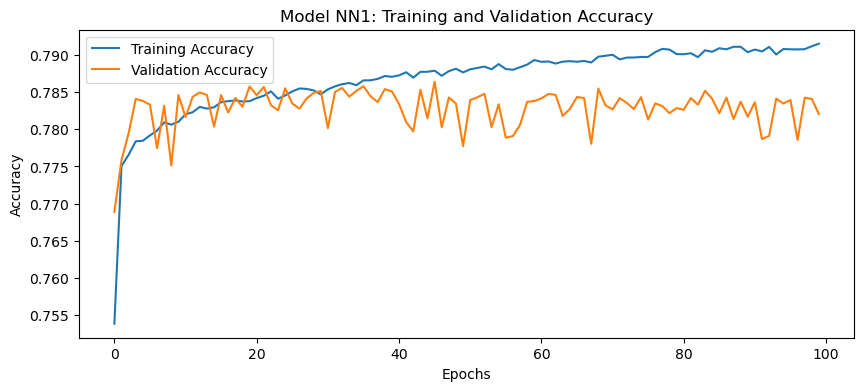

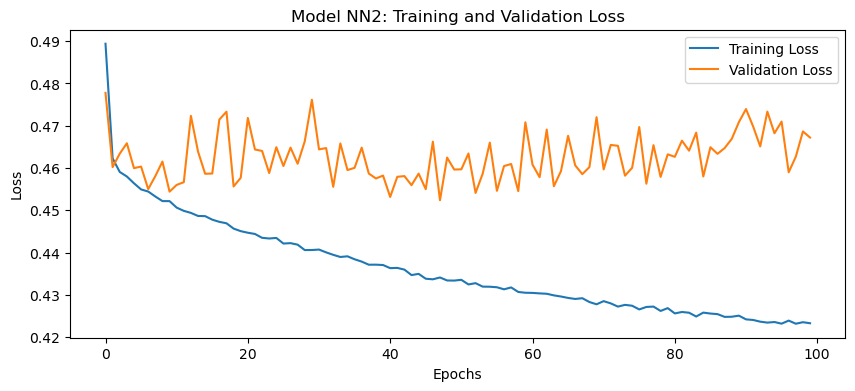

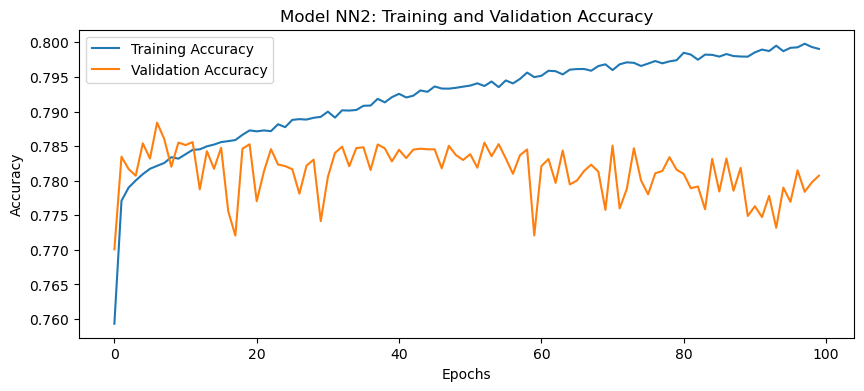

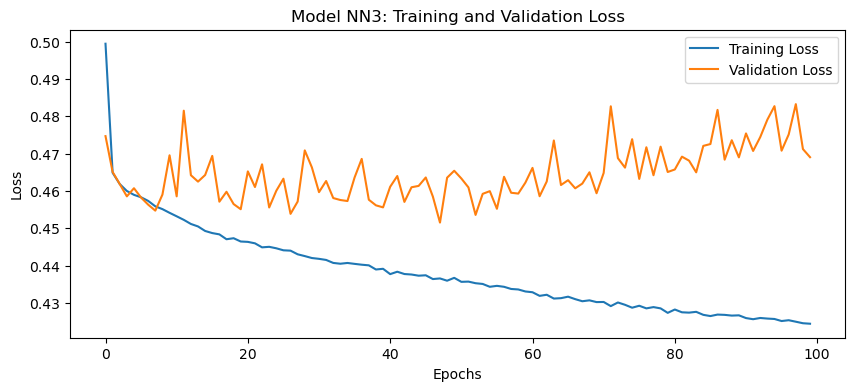

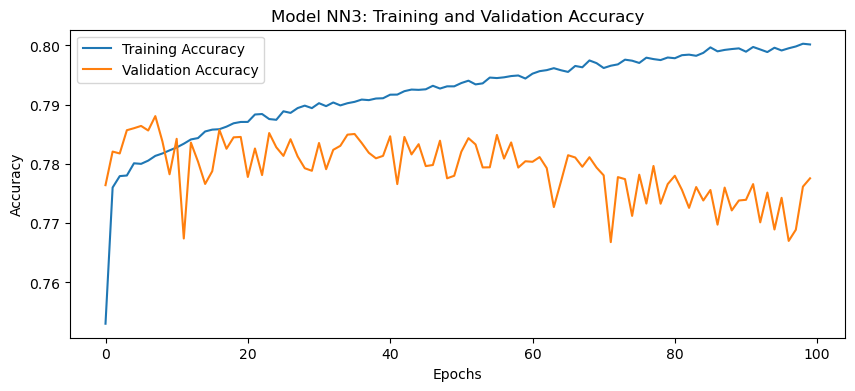

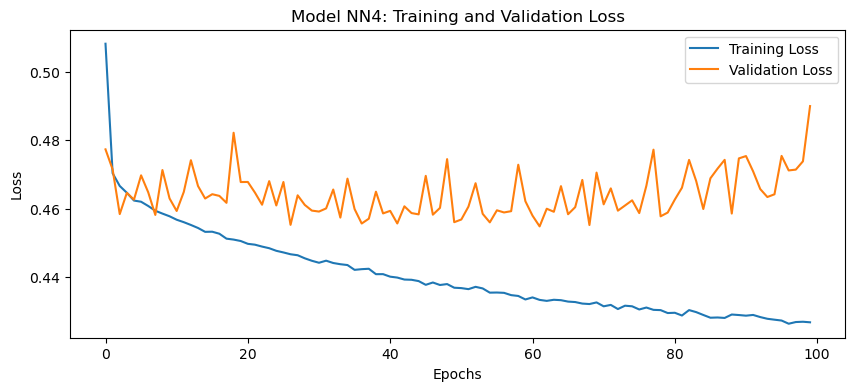

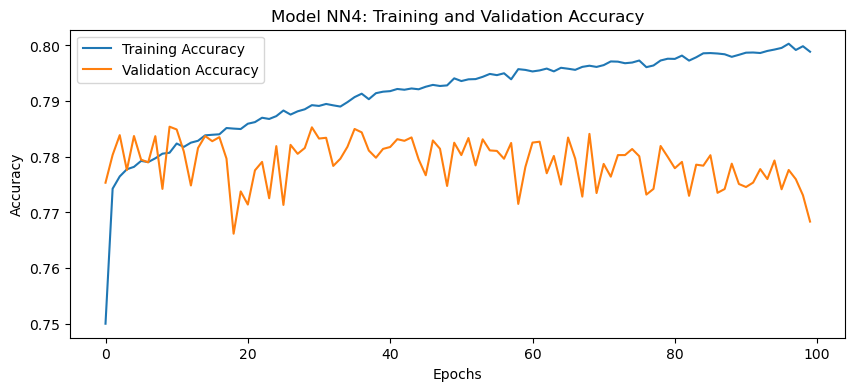

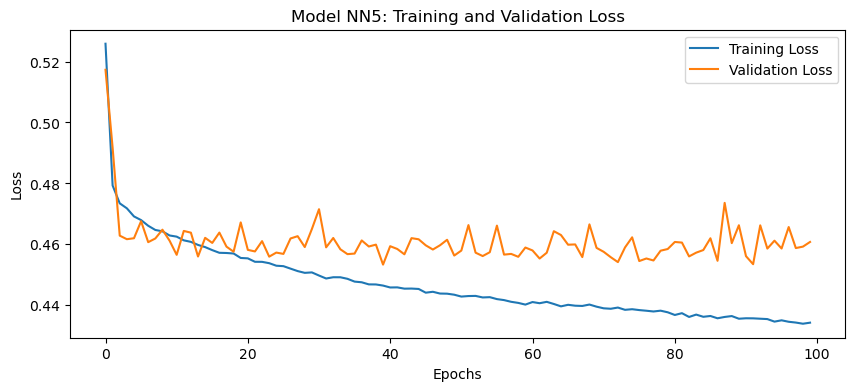

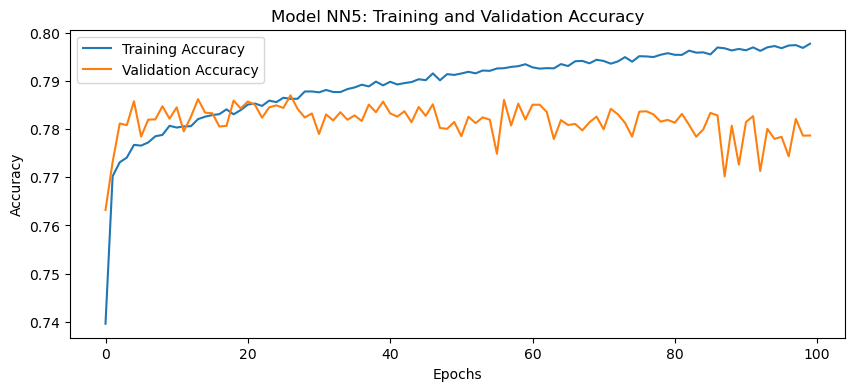


Evaluating model NN1 on test data
684/684 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


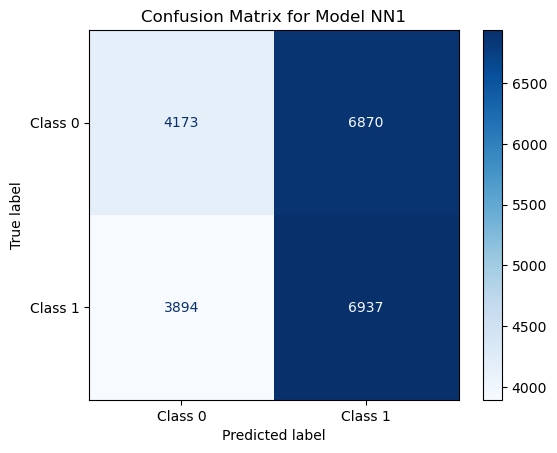


Evaluating model NN2 on test data
684/684 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


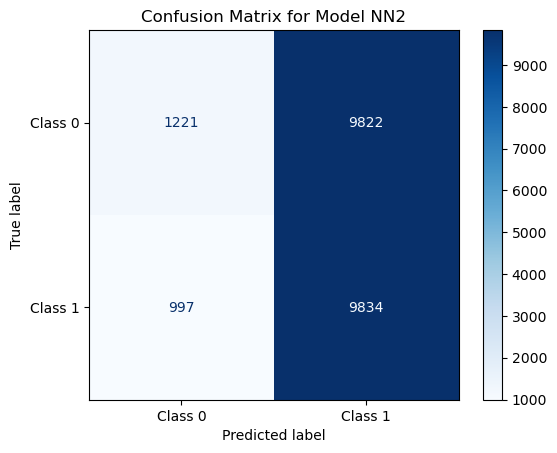


Evaluating model NN3 on test data
684/684 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


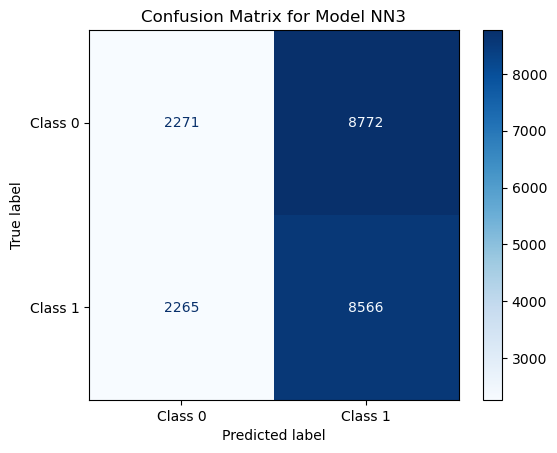


Evaluating model NN4 on test data
684/684 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


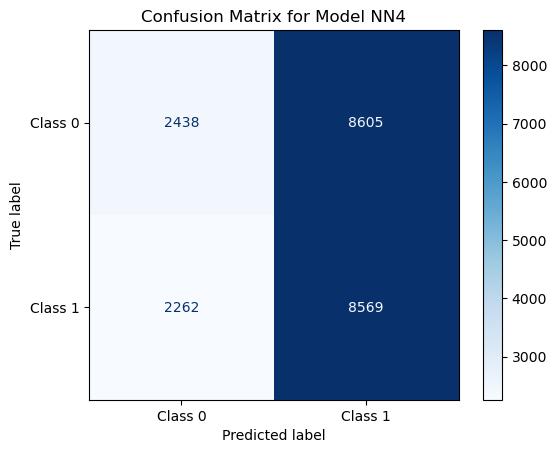


Evaluating model NN5 on test data
684/684 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


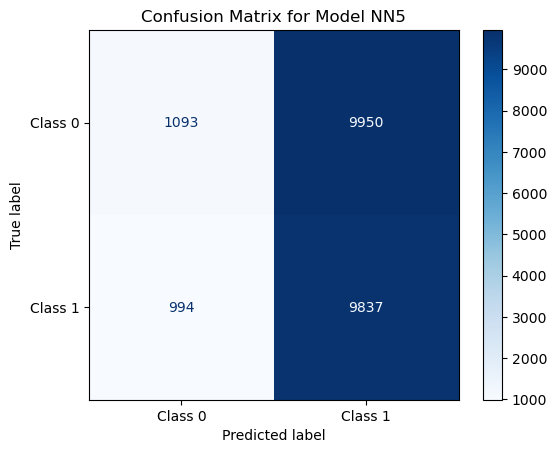

In [ ]:
import numpy as np
import os
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Directory where models are saved
model_directory = "saved_models_binary_classification_best_2"
model_paths = [os.path.join(model_directory, f"Model_NN{idx}.keras") for idx in range(1, 6)]

# Placeholder lists to store training and validation performance metrics
histories = []

# Load models and plot training history
for idx, model_path in enumerate(model_paths, start=1):
    print(f"Loading model from: {model_path}")
    model = tf.keras.models.load_model(model_path)

    # Evaluate the model and store the metrics
    history = model.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=100,
        batch_size=1000,
        verbose=0
    )
    histories.append(history)

# Plot Training and Validation Loss and Accuracy
for idx, history in enumerate(histories, start=1):
    # Extracting training and validation loss and accuracy
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']

    # Plot Training and Validation Loss
    plt.figure(figsize=(10, 4))
    plt.plot(loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.title(f'Model NN{idx}: Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    # Plot Training and Validation Accuracy
    plt.figure(figsize=(10, 4))
    plt.plot(accuracy, label='Training Accuracy')
    plt.plot(val_accuracy, label='Validation Accuracy')
    plt.title(f'Model NN{idx}: Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

# Evaluate models on test data and display Confusion Matrix
for idx, model_path in enumerate(model_paths, start=1):
    print(f"\nEvaluating model NN{idx} on test data")
    model = tf.keras.models.load_model(model_path)

    # Predict probabilities and binary outcomes
    predictions = model.predict(X_test)
    y_pred_binary = (predictions.flatten() > 0.5).astype(int)

    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred_binary)

    # Plot confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Class 0', 'Class 1'])
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix for Model NN{idx}')
    plt.show()


# Explanation of Permutation Feature Importance Code

This code is used to evaluate the feature importance of a neural network model by using **permutation feature importance**. Here’s a breakdown of what each part does:N5`).

2. **Evaluate Feature Importance**:
    - For each model, the following steps are performed:
      - **Loading the Model**: The saved model is loaded using TensorFlow.
      - **Baseline Accuracy**: The accuracy of the model is evaluated on the original test set (`X_test`), and this is used as a baseline for comparison.
      - **Permutation of Features**: For each feature in the dataset:
        - The values of the feature are randomly shuffled, which breaks its association with the target variable while keeping the rest of the data unchanged.
        - The model is then evaluated on the permuted data, and the new accuracy is calculated.
        - **Feature Importance**: The importance of a feature is measured as the drop in accuracy after shuffling it, which indicates how much the model relied on that feature.
    
3. **Sorting and Plotting Feature Importance**:
    - **Sort and Select Top 30 Features**: The features are sorted in descending order based on their importance scores, and the top 30 features are selectedmodel’s performance.

### Key Concepts:

- **Permutation Feature Importance**: This method measures the impact of each feature on model accuracy by shuffling it, which removes its predictive power. The larger the drop in accuracy, the more important the feature is.
- **Baseline Accuracy vs Permuted Accuracy**: By comparing the baseline accuracy (original data) with the accuracy after shuffling each feature, we can quantify the imhe trained neural networks.



Loading model NN1 from: saved_models_binary_classification_best_ultimate\Model_NN1.keras
684/684 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Baseline Accuracy for Model NN1: 0.7969
684/684 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Feature 2.0 importance: 0.0000
684/684 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Feature lti_gr1a importance: 0.0000
684/684 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Feature 3.0 importance: 0.0005
684/684 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Feature eqnpo_me importance: 0.0002
684/684 ━━━━━━━━━━━━━━━━━━━━ 1s 918us/step
Feature me importance: 0.0001
684/684 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Feature 4.0 importance: 0.0001
684/684 ━━━━━━━━━━━━━━━━━━━━ 1s 949us/step
Feature at_be importance: -0.0003
684/684 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Feature mispricing_mgmt importance: -0.0001
684/684 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Feature 5.0 importance: -0.0001
684/684 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Feature rmax1_21d importance: -0.0007
684/684 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Feature 6.0 importance: 0.0001


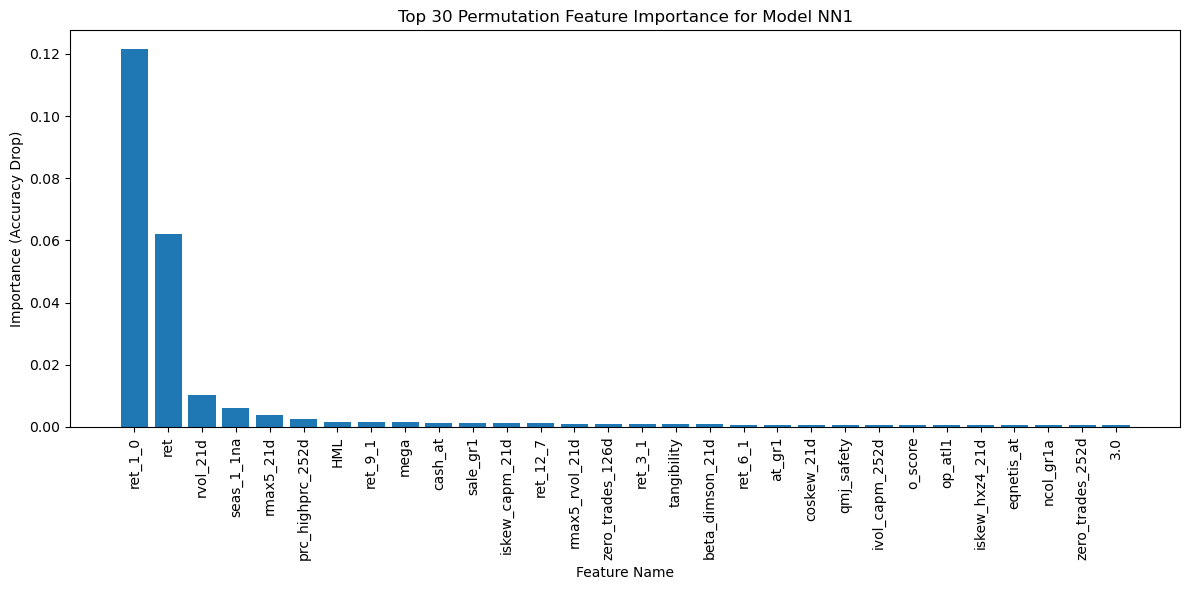


Loading model NN2 from: saved_models_binary_classification_best_ultimate\Model_NN2.keras
684/684 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Baseline Accuracy for Model NN2: 0.7898
684/684 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Feature 2.0 importance: -0.0003
684/684 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Feature lti_gr1a importance: -0.0002
684/684 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Feature 3.0 importance: 0.0000
684/684 ━━━━━━━━━━━━━━━━━━━━ 1s 878us/step
Feature eqnpo_me importance: 0.0003
684/684 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Feature me importance: -0.0000
684/684 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Feature 4.0 importance: 0.0001
684/684 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Feature at_be importance: 0.0003
684/684 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Feature mispricing_mgmt importance: 0.0008
684/684 ━━━━━━━━━━━━━━━━━━━━ 1s 973us/step
Feature 5.0 importance: -0.0001
684/684 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step  
Feature rmax1_21d importance: 0.0001
684/684 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Feature 6.0 importance: -0.00

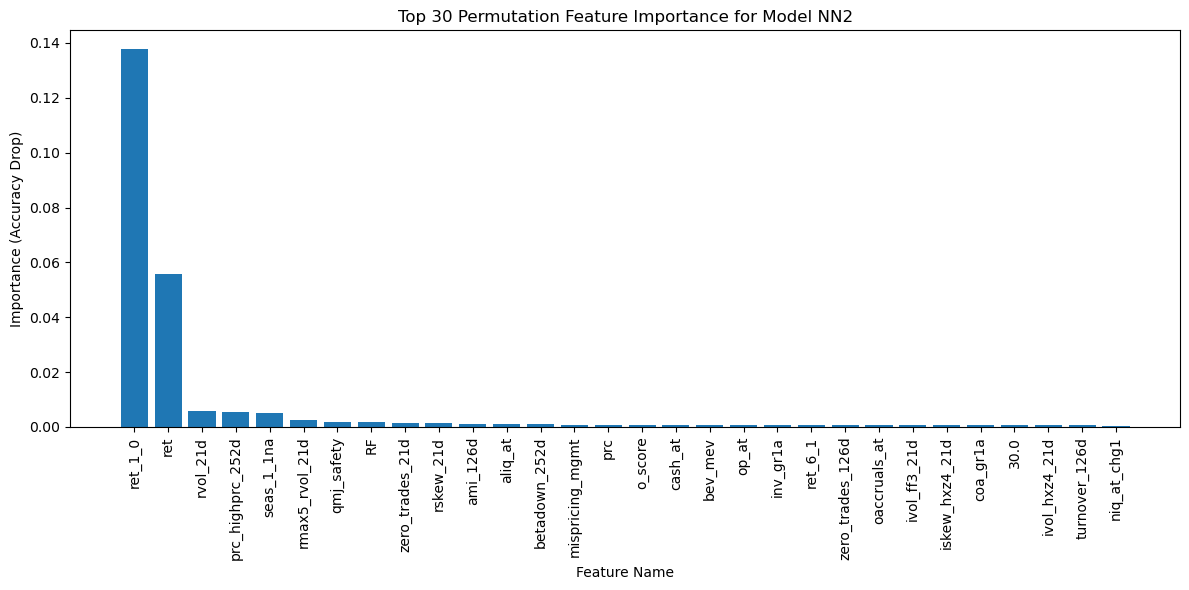


Loading model NN3 from: saved_models_binary_classification_best_ultimate\Model_NN3.keras
684/684 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Baseline Accuracy for Model NN3: 0.7935
684/684 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Feature 2.0 importance: 0.0000
684/684 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Feature lti_gr1a importance: 0.0000
684/684 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Feature 3.0 importance: -0.0001
684/684 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Feature eqnpo_me importance: -0.0007
684/684 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Feature me importance: 0.0001
684/684 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Feature 4.0 importance: -0.0001
684/684 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Feature at_be importance: -0.0008
684/684 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Feature mispricing_mgmt importance: -0.0006
684/684 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Feature 5.0 importance: 0.0000
684/684 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Feature rmax1_21d importance: 0.0012
684/684 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Feature 6.0 importance: 0.0005
684

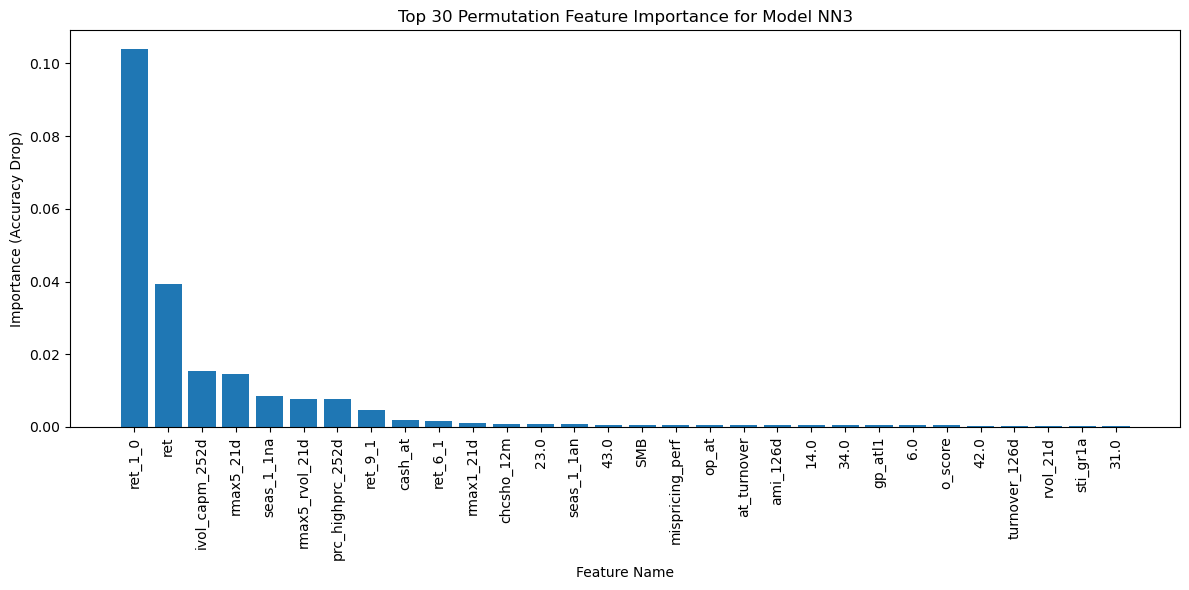


Loading model NN4 from: saved_models_binary_classification_best_ultimate\Model_NN4.keras
684/684 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
Baseline Accuracy for Model NN4: 0.7919
684/684 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Feature 2.0 importance: 0.0000
684/684 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Feature lti_gr1a importance: -0.0001
684/684 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Feature 3.0 importance: -0.0001
684/684 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Feature eqnpo_me importance: -0.0000
684/684 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Feature me importance: 0.0006
684/684 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Feature 4.0 importance: -0.0001
684/684 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Feature at_be importance: 0.0000
684/684 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Feature mispricing_mgmt importance: 0.0006
684/684 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Feature 5.0 importance: 0.0000
684/684 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Feature rmax1_21d importance: -0.0005
684/684 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Feature 6.0 importance: 0.0001
684

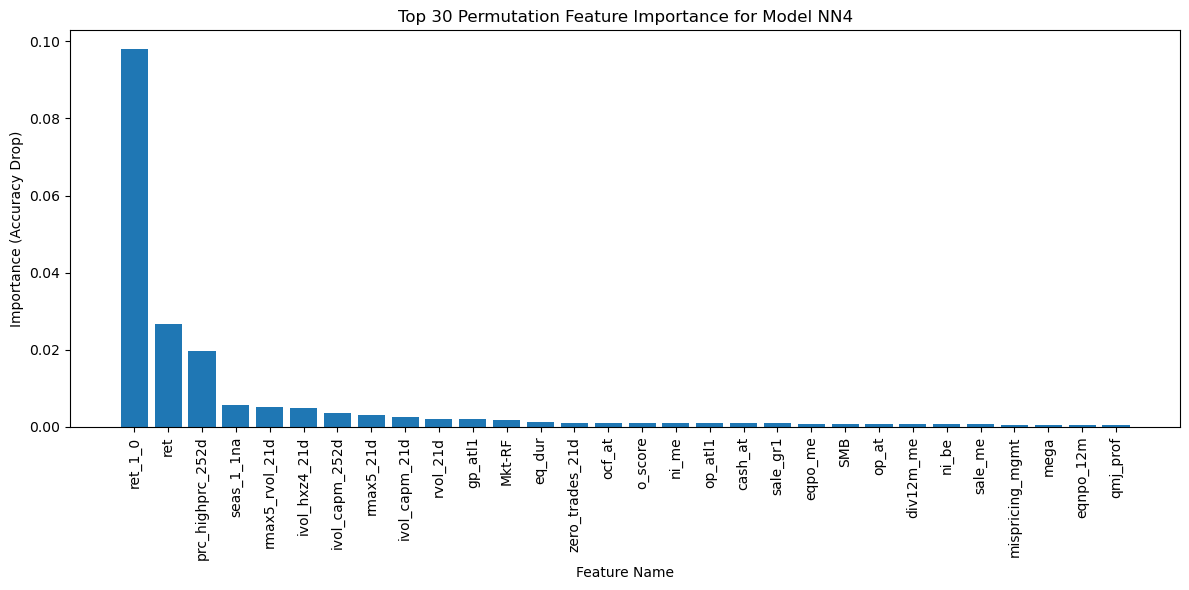


Loading model NN5 from: saved_models_binary_classification_best_ultimate\Model_NN5.keras
684/684 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Baseline Accuracy for Model NN5: 0.7896
684/684 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Feature 2.0 importance: 0.0005
684/684 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Feature lti_gr1a importance: 0.0004
684/684 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Feature 3.0 importance: 0.0000
684/684 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Feature eqnpo_me importance: 0.0003
684/684 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Feature me importance: 0.0001
684/684 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Feature 4.0 importance: 0.0001
684/684 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Feature at_be importance: -0.0002
684/684 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Feature mispricing_mgmt importance: -0.0001
684/684 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Feature 5.0 importance: 0.0000
684/684 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Feature rmax1_21d importance: 0.0029
684/684 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Feature 6.0 importance: 0.0001
684/68

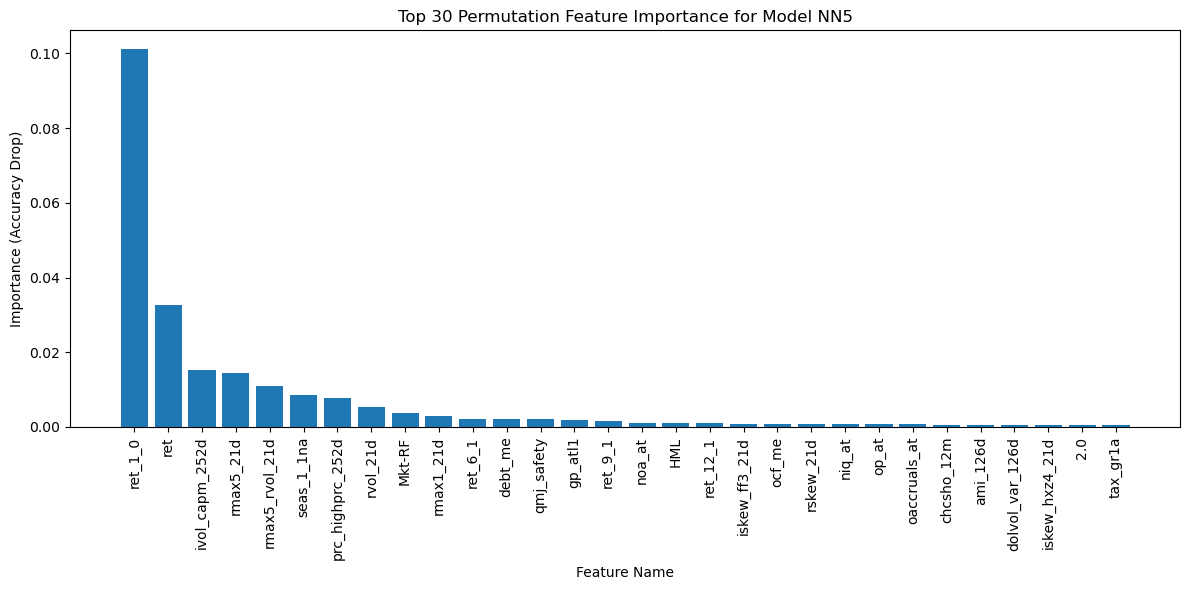

In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Assuming common_columns is a set, convert it to a list
common_columns = list(common_columns)

# Directory where models are saved
model_directory = "saved_models_binary_classification_best_ultimate"
model_paths = [os.path.join(model_directory, f"Model_NN{idx}.keras") for idx in range(1, 6)]

# Load models and evaluate permutation feature importance
for idx, model_path in enumerate(model_paths, start=1):
    print(f"\nLoading model NN{idx} from: {model_path}")
    model = tf.keras.models.load_model(model_path)

    # Calculate baseline accuracy
    y_pred = (model.predict(X_test) > 0.5).astype(int)
    baseline_accuracy = accuracy_score(y_test, y_pred)
    print(f"Baseline Accuracy for Model NN{idx}: {baseline_accuracy:.4f}")

    # Permutation feature importance
    feature_importances = []
    for col in range(X_test.shape[1]):
        X_test_permuted = X_test.copy()
        X_test_permuted.iloc[:, col] = np.random.permutation(X_test_permuted.iloc[:, col])  # Shuffle values in the column

        # Calculate accuracy after shuffling the feature
        y_pred_permuted = (model.predict(X_test_permuted) > 0.5).astype(int)
        permuted_accuracy = accuracy_score(y_test, y_pred_permuted)

        # Importance is the drop in accuracy due to shuffling
        importance = baseline_accuracy - permuted_accuracy
        feature_importances.append(importance)

        print(f"Feature {common_columns[col]} importance: {importance:.4f}")

    # Sort features by importance and select the top 30
    sorted_indices = np.argsort(feature_importances)[-30:][::-1]
    top_features = [str(common_columns[i]) for i in sorted_indices]  # Convert to string to avoid TypeError
    top_importances = [feature_importances[i] for i in sorted_indices]

    # Plotting the top 30 feature importances
    plt.figure(figsize=(12, 6))
    plt.bar(top_features, top_importances)
    plt.xticks(rotation=90)
    plt.xlabel('Feature Name')
    plt.ylabel('Importance (Accuracy Drop)')
    plt.title(f'Top 30 Permutation Feature Importance for Model NN{idx}')
    plt.tight_layout()
    plt.show()

684/684 ━━━━━━━━━━━━━━━━━━━━ 0s 506us/step
684/684 ━━━━━━━━━━━━━━━━━━━━ 0s 601us/step
684/684 ━━━━━━━━━━━━━━━━━━━━ 0s 552us/step
684/684 ━━━━━━━━━━━━━━━━━━━━ 0s 563us/step
684/684 ━━━━━━━━━━━━━━━━━━━━ 0s 662us/step
684/684 ━━━━━━━━━━━━━━━━━━━━ 0s 523us/step
684/684 ━━━━━━━━━━━━━━━━━━━━ 1s 681us/step
684/684 ━━━━━━━━━━━━━━━━━━━━ 0s 525us/step
684/684 ━━━━━━━━━━━━━━━━━━━━ 0s 622us/step
684/684 ━━━━━━━━━━━━━━━━━━━━ 0s 493us/step
684/684 ━━━━━━━━━━━━━━━━━━━━ 0s 631us/step
684/684 ━━━━━━━━━━━━━━━━━━━━ 0s 606us/step
684/684 ━━━━━━━━━━━━━━━━━━━━ 1s 747us/step
684/684 ━━━━━━━━━━━━━━━━━━━━ 0s 612us/step
684/684 ━━━━━━━━━━━━━━━━━━━━ 1s 667us/step
684/684 ━━━━━━━━━━━━━━━━━━━━ 0s 569us/step
684/684 ━━━━━━━━━━━━━━━━━━━━ 0s 641us/step
684/684 ━━━━━━━━━━━━━━━━━━━━ 1s 653us/step
684/684 ━━━━━━━━━━━━━━━━━━━━ 1s 646us/step
684/684 ━━━━━━━━━━━━━━━━━━━━ 1s 664us/step
684/684 ━━━━━━━━━━━━━━━━━━━━ 1s 714us/step
684/684 ━━━━━━━━━━━━━━━━━━━━ 1s 780us/step
684/684 ━━━━━━━━━━━━━━━━━━━━ 1s 722us/step
684/684 ━━━

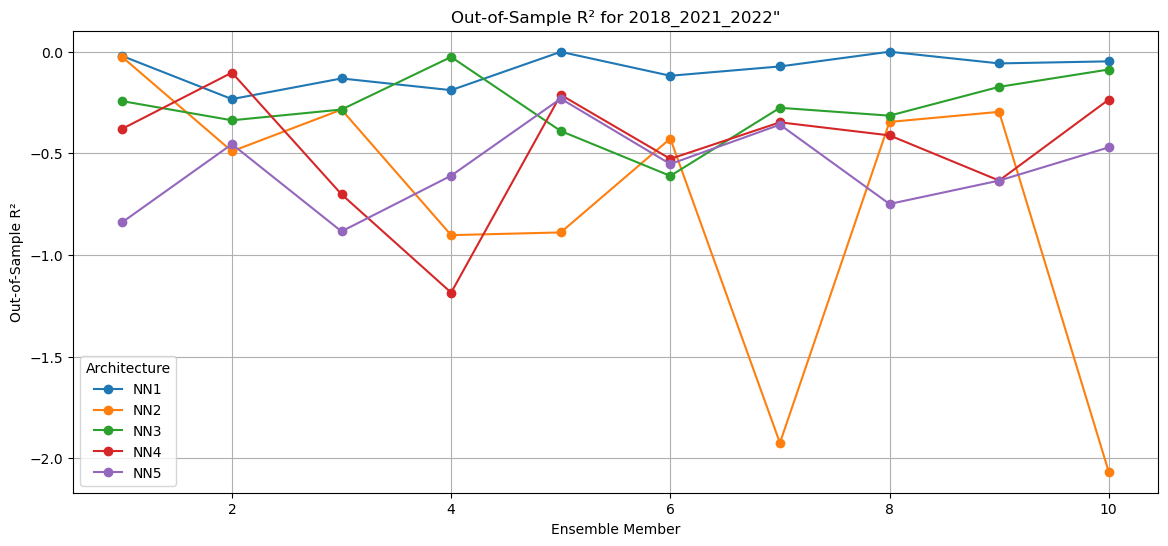

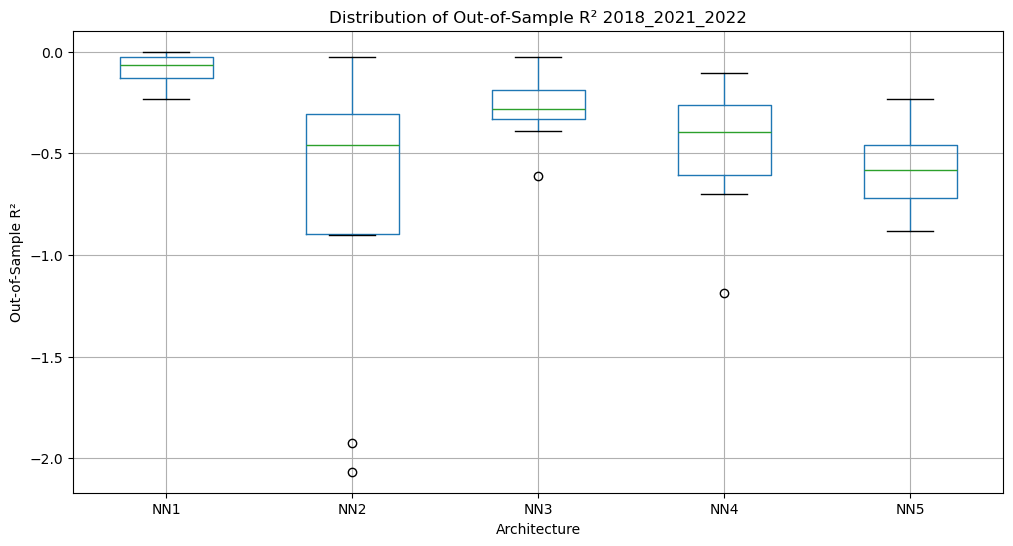

In [ ]:
# Convert X_test to a NumPy array with dtype float32
X_test = np.array(X_test, dtype=np.float32)

# Specify the folder where the models are saved
model_folder = "saved_models_ultimate_ttv_4"

# List to store model paths
model_paths = []

# Iterate over model numbers to get paths
for i in range(1, 6):  # NN1 to NN5
    for j in range(1, 11):  # Ensemble 1 to 10 (adjusted to match the training phase)
        model_path = os.path.join(model_folder, f"NN{i}_ensemble_{j}.keras")
        model_paths.append((f"NN{i}", model_path))

# Function to calculate out-of-sample R²
def calculate_r2_oos(y_true, y_pred):
    numerator = np.sum((y_true - y_pred) ** 2)
    denominator = np.sum(y_true ** 2)
    return 1 - (numerator / denominator)

# Dictionary to store R² results for each model architecture
r2_results = {}

# Iterate over all models, load them, and evaluate R²
for architecture, model_path in model_paths:
    # Load the model
    model = tf.keras.models.load_model(model_path)
    # Make predictions
    y_pred = model.predict(X_test).flatten()
    # Calculate out-of-sample R²
    r2_oos = calculate_r2_oos(y_test, y_pred)
    # Store result
    if architecture not in r2_results:
        r2_results[architecture] = []
    r2_results[architecture].append(r2_oos)

# Convert R² results to DataFrame for easier plotting
r2_df = pd.DataFrame(dict([(k, pd.Series(v)) for k, v in r2_results.items()]))

# Plot 1: Out-of-Sample R² for All Models
plt.figure(figsize=(14, 6))
for architecture in r2_results.keys():
    plt.plot(range(1, len(r2_results[architecture]) + 1), r2_results[architecture], marker='o', label=architecture)
plt.xlabel('Ensemble Member')
plt.ylabel('Out-of-Sample R²')
plt.title('Out-of-Sample R² for 2018_2021_2022"')
plt.legend(title="Architecture")
plt.grid(True)
plt.show()

# Plot 2: Box Plot of R² Scores for Each Architecture
plt.figure(figsize=(12, 6))
r2_df.boxplot(grid=False)
plt.xlabel('Architecture')
plt.ylabel('Out-of-Sample R²')
plt.title('Distribution of Out-of-Sample R² 2018_2021_2022')
plt.grid(True)
plt.show()

684/684 ━━━━━━━━━━━━━━━━━━━━ 0s 512us/step
684/684 ━━━━━━━━━━━━━━━━━━━━ 0s 523us/step
684/684 ━━━━━━━━━━━━━━━━━━━━ 0s 472us/step
684/684 ━━━━━━━━━━━━━━━━━━━━ 0s 493us/step
684/684 ━━━━━━━━━━━━━━━━━━━━ 0s 534us/step
684/684 ━━━━━━━━━━━━━━━━━━━━ 0s 559us/step
684/684 ━━━━━━━━━━━━━━━━━━━━ 0s 575us/step
684/684 ━━━━━━━━━━━━━━━━━━━━ 0s 476us/step
684/684 ━━━━━━━━━━━━━━━━━━━━ 0s 493us/step
684/684 ━━━━━━━━━━━━━━━━━━━━ 0s 480us/step
684/684 ━━━━━━━━━━━━━━━━━━━━ 0s 578us/step
684/684 ━━━━━━━━━━━━━━━━━━━━ 0s 543us/step
684/684 ━━━━━━━━━━━━━━━━━━━━ 1s 809us/step
684/684 ━━━━━━━━━━━━━━━━━━━━ 0s 549us/step
684/684 ━━━━━━━━━━━━━━━━━━━━ 0s 578us/step
684/684 ━━━━━━━━━━━━━━━━━━━━ 1s 744us/step
684/684 ━━━━━━━━━━━━━━━━━━━━ 0s 550us/step
684/684 ━━━━━━━━━━━━━━━━━━━━ 0s 628us/step
684/684 ━━━━━━━━━━━━━━━━━━━━ 0s 525us/step
684/684 ━━━━━━━━━━━━━━━━━━━━ 0s 579us/step
684/684 ━━━━━━━━━━━━━━━━━━━━ 1s 678us/step
684/684 ━━━━━━━━━━━━━━━━━━━━ 0s 579us/step
684/684 ━━━━━━━━━━━━━━━━━━━━ 0s 590us/step
684/684 ━━━

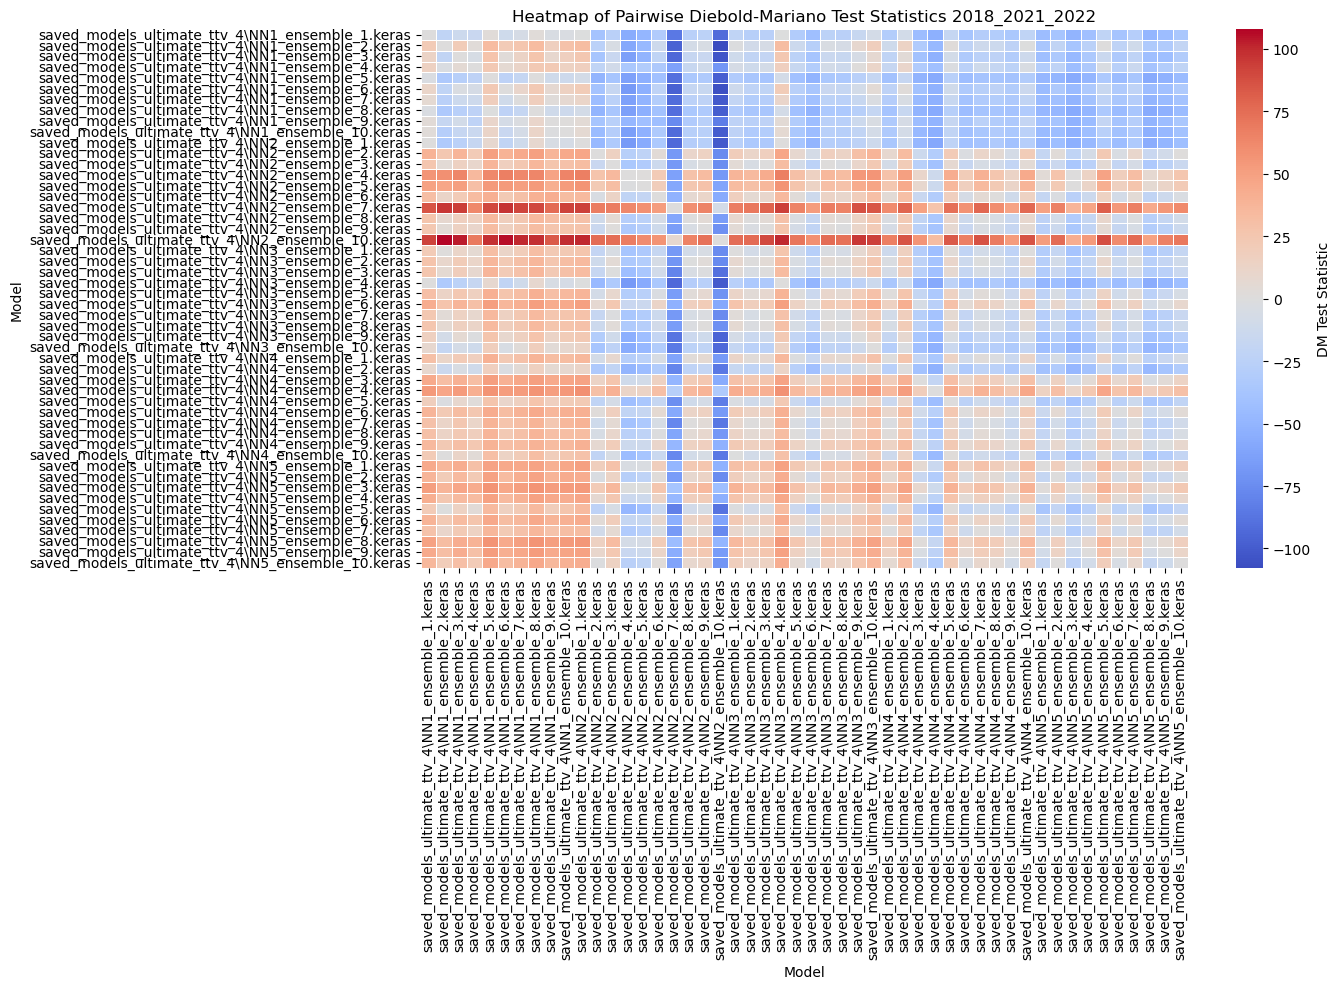

C:\Users\filip\AppData\Local\Temp\ipykernel_18716\3196897315.py:84: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(dm_average_scores.keys()), y=list(dm_average_scores.values()), palette='viridis')


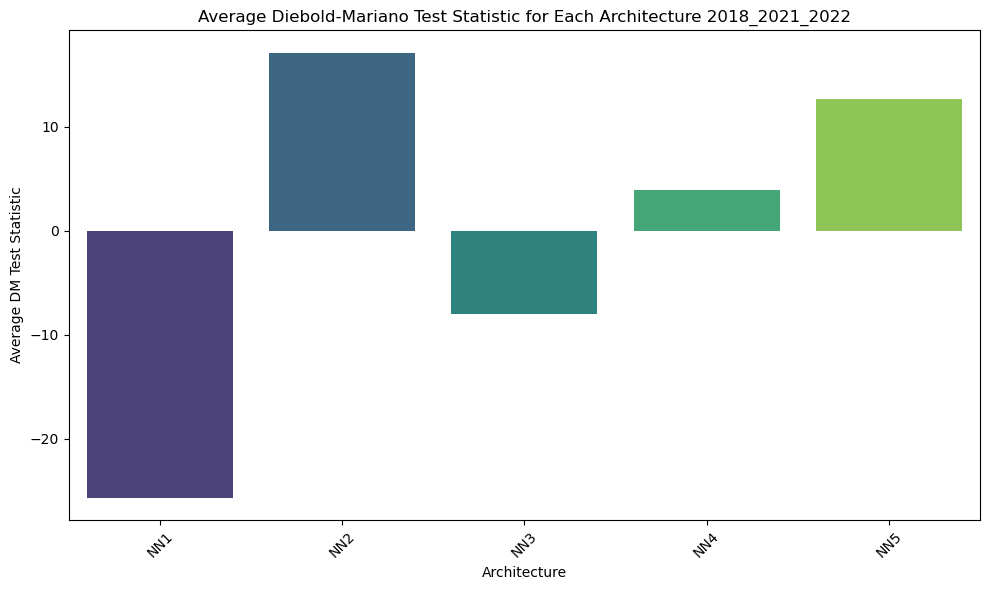

In [ ]:
# Specify the folder where the models are saved
model_folder = "saved_models_ultimate_ttv_4"

# List to store model paths
model_paths = []

# Iterate over model numbers to get paths
for i in range(1, 6):  # NN1 to NN5
    for j in range(1, 11):  # Ensemble 1 to 10 (adjusted to match the training phase)
        model_path = os.path.join(model_folder, f"NN{i}_ensemble_{j}.keras")
        model_paths.append(model_path)

# Ensure test data is in NumPy format
if isinstance(X_test, pd.DataFrame):
    X_test = X_test.to_numpy()
if isinstance(y_test, pd.Series):
    y_test = y_test.to_numpy().flatten()

# Function to calculate Diebold-Mariano statistic
def diebold_mariano_test(e1, e2, h=1):
    d = (e1 ** 2) - (e2 ** 2)  # Squared error differences
    mean_d = np.mean(d)
    var_d = np.var(d)
    dm_stat = mean_d / np.sqrt(var_d / len(d))
    return dm_stat

# Store prediction errors for each model
prediction_errors = {}

# Load all models and calculate prediction errors
for model_path in model_paths:
    # Load the model
    model = tf.keras.models.load_model(model_path)
    # Make predictions
    y_pred = model.predict(X_test).flatten()
    # Calculate prediction errors
    prediction_errors[model_path] = y_test - y_pred

# Prepare the model names for evaluation
model_names = list(prediction_errors.keys())

# Create a table to store DM test statistics
dm_results = pd.DataFrame(index=model_names, columns=model_names, dtype=float)

# Pairwise Diebold-Mariano tests
for i in range(len(model_names)):
    for j in range(i + 1, len(model_names)):
        model_1 = model_names[i]
        model_2 = model_names[j]
        e1 = prediction_errors[model_1]
        e2 = prediction_errors[model_2]
        dm_stat = diebold_mariano_test(e1, e2)
        dm_results.at[model_1, model_2] = dm_stat
        dm_results.at[model_2, model_1] = -dm_stat  # symmetric

# Replace NaN with 0 for visualization purposes (diagonal elements)
dm_results.fillna(0, inplace=True)

# Plot 1: Heatmap of Diebold-Mariano Test Statistics (Pairwise Comparison)
plt.figure(figsize=(14, 10))
sns.heatmap(dm_results, cmap='coolwarm', annot=False, fmt=".2f", linewidths=0.5, cbar_kws={'label': 'DM Test Statistic'})
plt.title('Heatmap of Pairwise Diebold-Mariano Test Statistics 2018_2021_2022')
plt.xlabel('Model')
plt.ylabel('Model')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Plot 2: Bar Plot of Average Diebold-Mariano Statistic for Each Architecture
# Extract architecture names from model paths and group DM scores by architecture
dm_average_scores = {}
for architecture in r2_results.keys():
    dm_stats = []
    for model_name in model_names:
        if architecture in model_name:
            # Get all pairwise comparisons for this model (excluding self-comparisons)
            dm_stats += [dm_results.at[model_name, other] for other in model_names if model_name != other and pd.notna(dm_results.at[model_name, other])]
    if dm_stats:
        dm_average_scores[architecture] = np.mean(dm_stats)

# Plot the average DM test statistics
plt.figure(figsize=(10, 6))
sns.barplot(x=list(dm_average_scores.keys()), y=list(dm_average_scores.values()), palette='viridis')
plt.xlabel('Architecture')
plt.ylabel('Average DM Test Statistic')
plt.title('Average Diebold-Mariano Test Statistic for Each Architecture 2018_2021_2022')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


684/684 ━━━━━━━━━━━━━━━━━━━━ 0s 544us/step
684/684 ━━━━━━━━━━━━━━━━━━━━ 0s 470us/step
684/684 ━━━━━━━━━━━━━━━━━━━━ 0s 540us/step
684/684 ━━━━━━━━━━━━━━━━━━━━ 0s 476us/step
684/684 ━━━━━━━━━━━━━━━━━━━━ 0s 475us/step
684/684 ━━━━━━━━━━━━━━━━━━━━ 0s 533us/step
684/684 ━━━━━━━━━━━━━━━━━━━━ 0s 498us/step
684/684 ━━━━━━━━━━━━━━━━━━━━ 0s 561us/step
684/684 ━━━━━━━━━━━━━━━━━━━━ 0s 501us/step
684/684 ━━━━━━━━━━━━━━━━━━━━ 0s 559us/step
684/684 ━━━━━━━━━━━━━━━━━━━━ 0s 491us/step
684/684 ━━━━━━━━━━━━━━━━━━━━ 0s 539us/step
684/684 ━━━━━━━━━━━━━━━━━━━━ 0s 477us/step
684/684 ━━━━━━━━━━━━━━━━━━━━ 0s 487us/step
684/684 ━━━━━━━━━━━━━━━━━━━━ 0s 460us/step
684/684 ━━━━━━━━━━━━━━━━━━━━ 0s 501us/step
684/684 ━━━━━━━━━━━━━━━━━━━━ 0s 472us/step
684/684 ━━━━━━━━━━━━━━━━━━━━ 0s 434us/step
684/684 ━━━━━━━━━━━━━━━━━━━━ 0s 439us/step
684/684 ━━━━━━━━━━━━━━━━━━━━ 0s 454us/step
684/684 ━━━━━━━━━━━━━━━━━━━━ 0s 461us/step
684/684 ━━━━━━━━━━━━━━━━━━━━ 0s 452us/step
684/684 ━━━━━━━━━━━━━━━━━━━━ 0s 457us/step
684/684 ━━━

C:\Users\filip\AppData\Local\Temp\ipykernel_18716\2850669093.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=r2_reduction_df.index, y=r2_reduction_df['Reduction in R²'], palette='viridis')


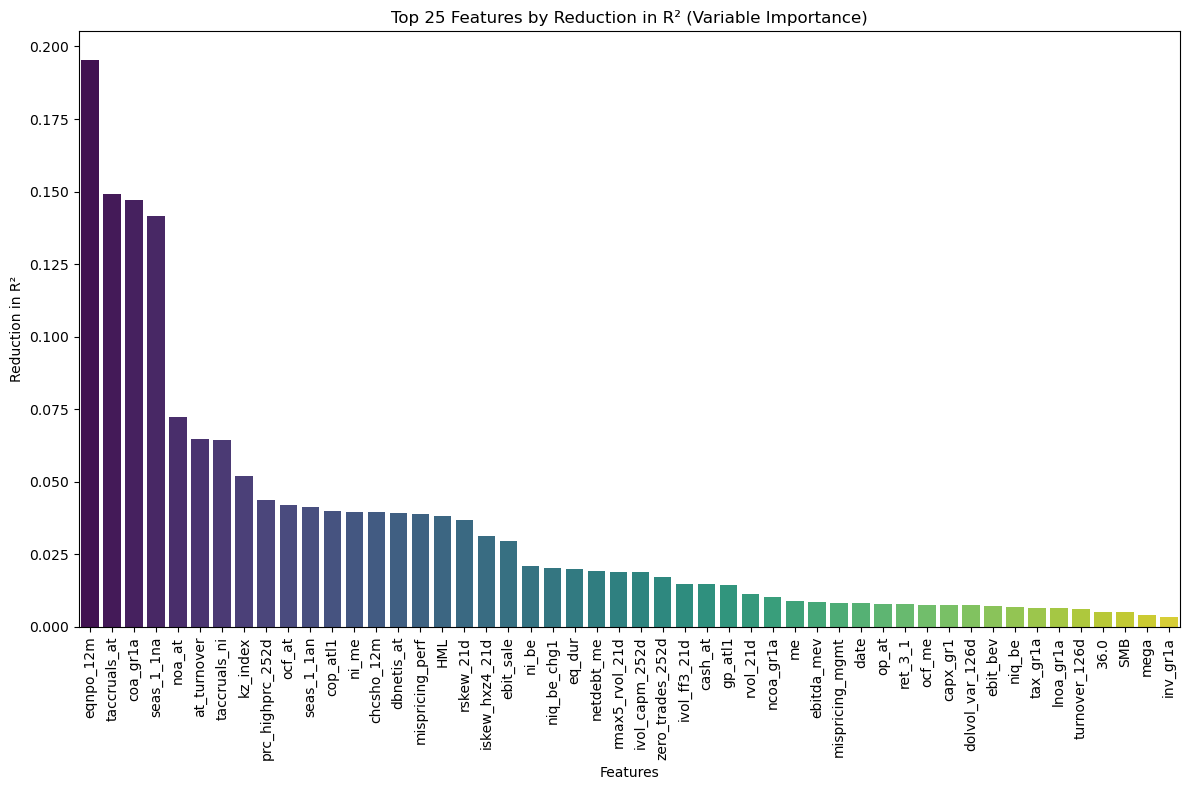

In [ ]:
common_columns = list(common_columns)
definitive_index_to_column = {idx: col for idx, col in enumerate(common_columns)}
# Function to calculate out-of-sample R²
def calculate_r2_oos(y_true, y_pred):
    numerator = np.sum((y_true - y_pred) ** 2)
    denominator = np.sum(y_true ** 2)
    return 1 - (numerator / denominator)

# **Reduction in Predictive R² Methodology**
r2_reduction = {}

# Load your trained model
model_path = "saved_models_ultimate_ttv_4/NN1_ensemble_10.keras"  # Example model path
model = tf.keras.models.load_model(model_path)

# Calculate original R²
original_r2 = calculate_r2_oos(y_test, model.predict(X_test).flatten())


# Iterate over features for R² reduction
for col_idx in range(X_test.shape[1]):
    X_test_modified = X_test.copy()
    X_test_modified[:, col_idx] = 0  # Set values of the feature to zero

    # Predict using the modified test set
    y_pred_modified = model.predict(X_test_modified).flatten()

    # Map feature index to name
    feature_name = definitive_index_to_column[col_idx]
    reduction = original_r2 - calculate_r2_oos(y_test, y_pred_modified)
    r2_reduction[feature_name] = reduction


# Convert R² reduction results to a pandas DataFrame and visualize top 25
r2_reduction_df = pd.DataFrame.from_dict(r2_reduction, orient='index', columns=['Reduction in R²'])
r2_reduction_df = r2_reduction_df.sort_values(by='Reduction in R²', ascending=False).head(50)

# Plot: Reduction in R² for Top 25 Most Important Features
plt.figure(figsize=(12, 8))
sns.barplot(x=r2_reduction_df.index, y=r2_reduction_df['Reduction in R²'], palette='viridis')
plt.xlabel('Features')
plt.ylabel('Reduction in R²')
plt.title('Top 25 Features by Reduction in R² (Variable Importance)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()